In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set styling
sns.set(style='whitegrid')
df = pd.read_csv('cme_matched_data.csv')
df['cme_t0'] = pd.to_datetime(df['cme_t0'])
df = df.sort_values('cme_t0')

# Parameter list
params = [
    'proton_density', 'proton_bulk_speed', 'proton_xvelocity', 'proton_yvelocity', 'proton_zvelocity',
    'proton_thermal', 'alpha_density', 'alpha_bulk_speed', 'alpha_thermal'
]


In [37]:
df.isna().sum()

proton_density       121
proton_bulk_speed    121
proton_xvelocity     121
proton_yvelocity     121
proton_zvelocity     121
proton_thermal       121
alpha_density        121
alpha_bulk_speed     121
alpha_thermal        121
spacecraft_xpos      121
spacecraft_ypos      121
spacecraft_zpos      121
source_file          121
cme_t0                 0
dtype: int64

In [38]:
df.dropna(inplace=True)
df.shape

(843, 14)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: For better plot styles
sns.set(style="whitegrid")


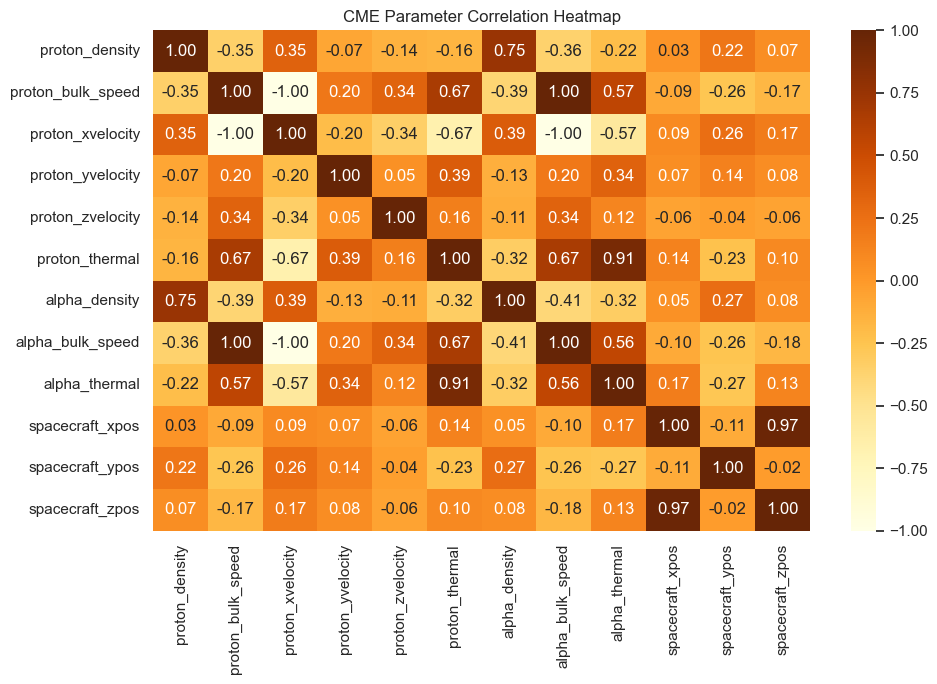

In [40]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrBr', fmt=".2f")
plt.title("CME Parameter Correlation Heatmap")
plt.tight_layout()
plt.show()


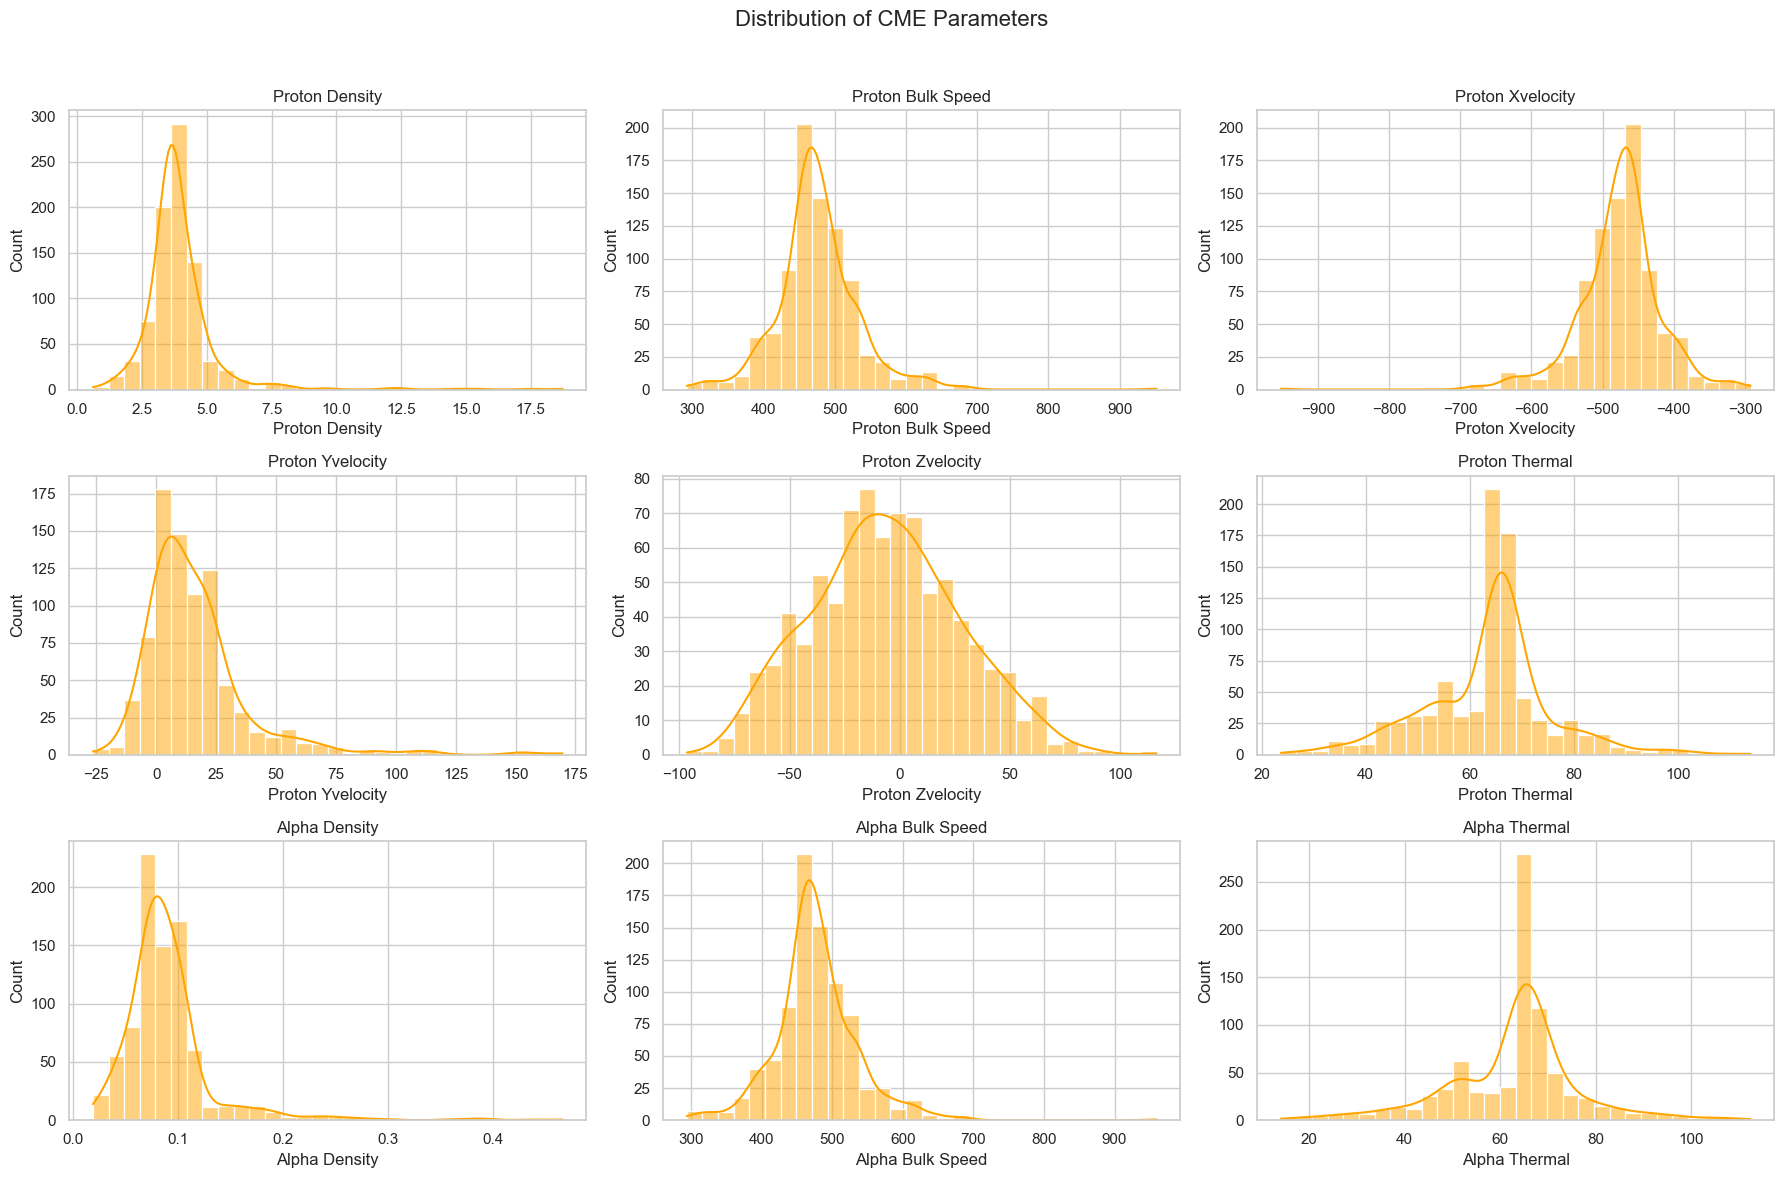

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, param in enumerate(params):
    sns.histplot(df[param].dropna(), kde=True, ax=axes[i], color='orange', bins=30)
    axes[i].set_title(f"{param.replace('_', ' ').title()}")
    axes[i].set_xlabel(param.replace('_', ' ').title())
    axes[i].set_ylabel('Count')

plt.suptitle("Distribution of CME Parameters", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


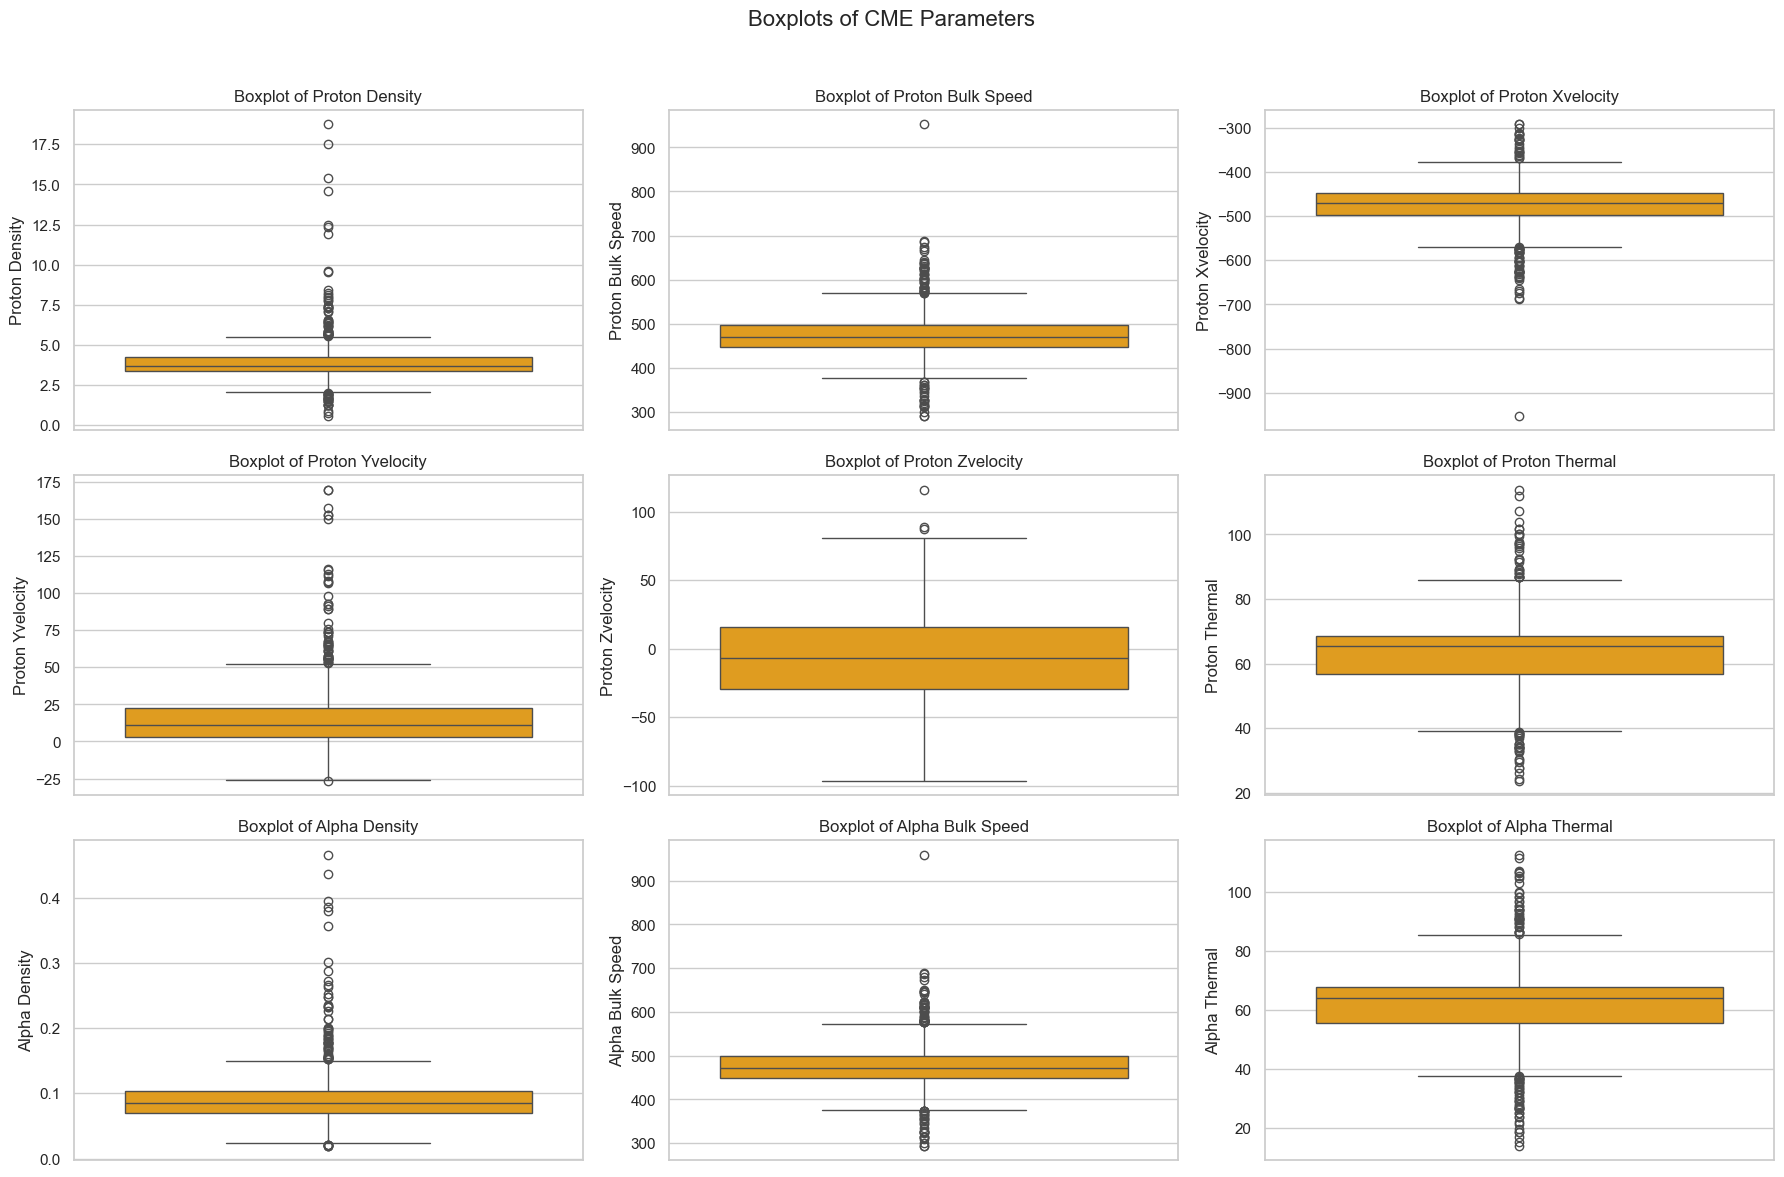

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, param in enumerate(params):
    sns.boxplot(y=df[param], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot of {param.replace('_', ' ').title()}")
    axes[i].set_ylabel(param.replace('_', ' ').title())

plt.suptitle("Boxplots of CME Parameters", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


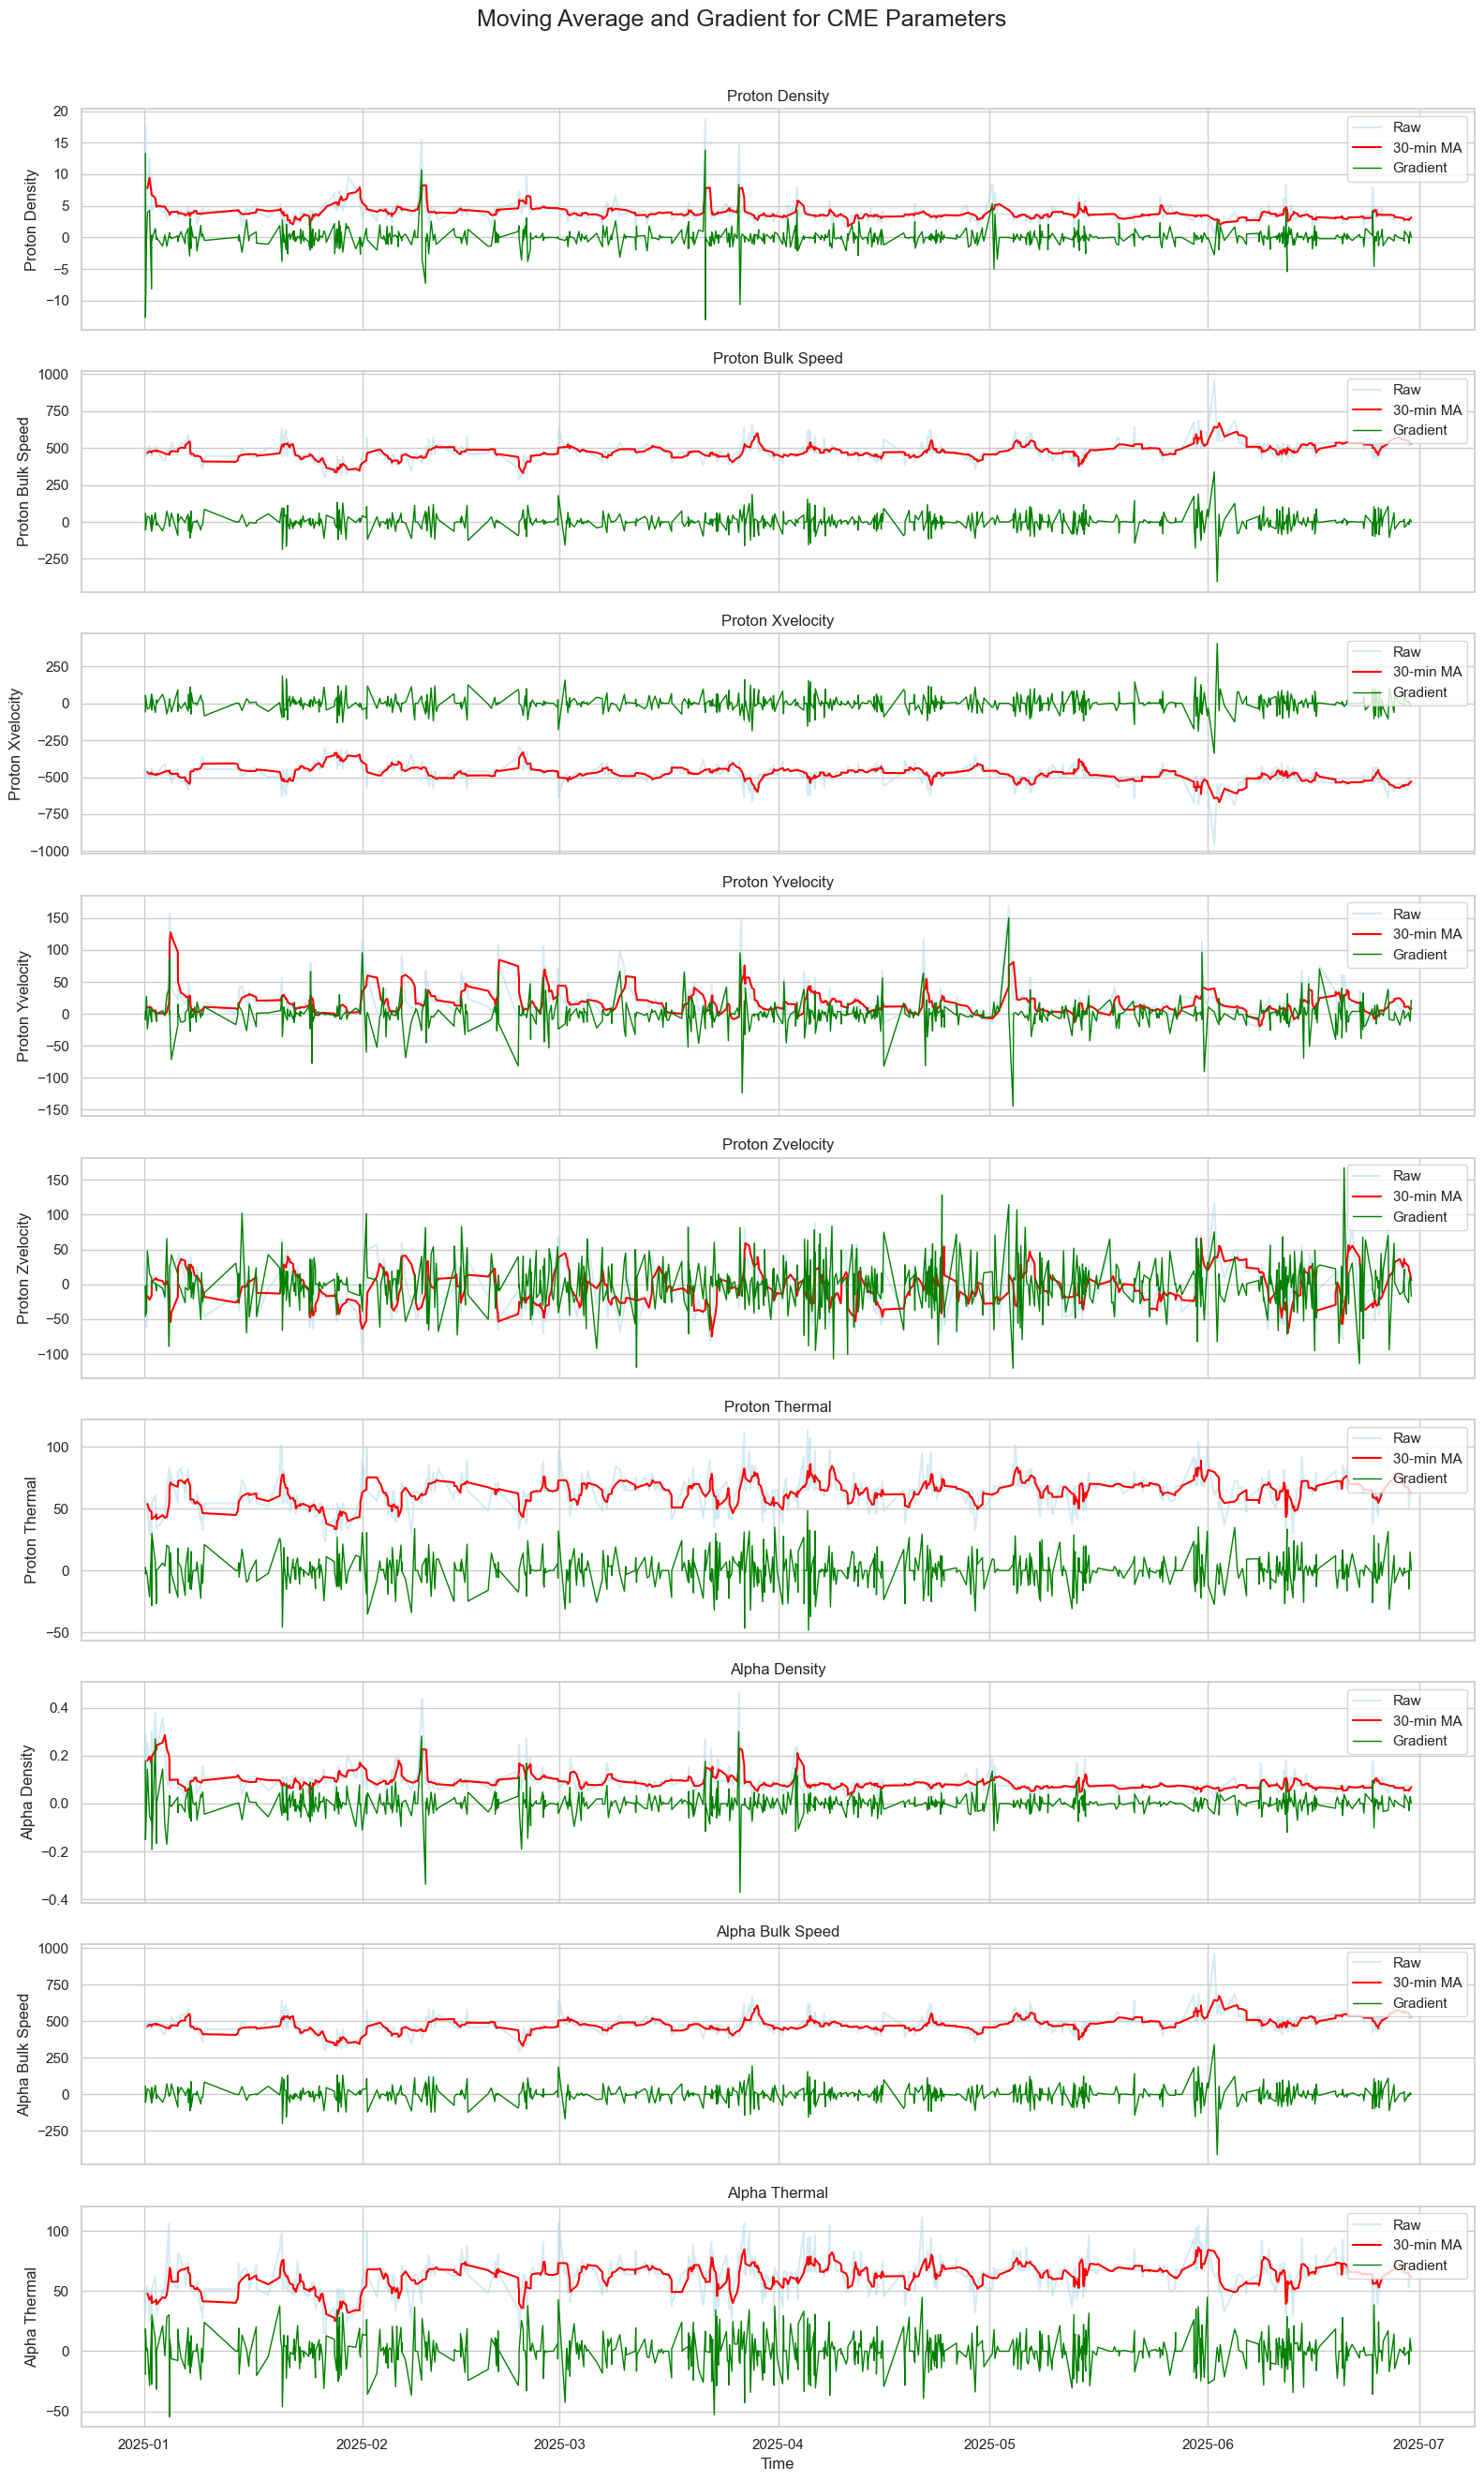

In [43]:
n = len(params)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(16, 3 * n), sharex=True)

for i, param in enumerate(params):
    df[f'{param}_ma'] = df[param].rolling(window=5).mean()
    df[f'{param}_grad'] = df[param].diff()

    axes[i].plot(df['cme_t0'], df[param], label='Raw', color='lightblue', alpha=0.5)
    axes[i].plot(df['cme_t0'], df[f'{param}_ma'], label='30-min MA', color='red', linewidth=1.5)
    axes[i].plot(df['cme_t0'], df[f'{param}_grad'], label='Gradient', color='green', linewidth=1)

    axes[i].set_title(f'{param.replace("_", " ").title()}')
    axes[i].set_ylabel(param.replace('_', ' ').title())
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel('Time')
plt.suptitle("Moving Average and Gradient for CME Parameters", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


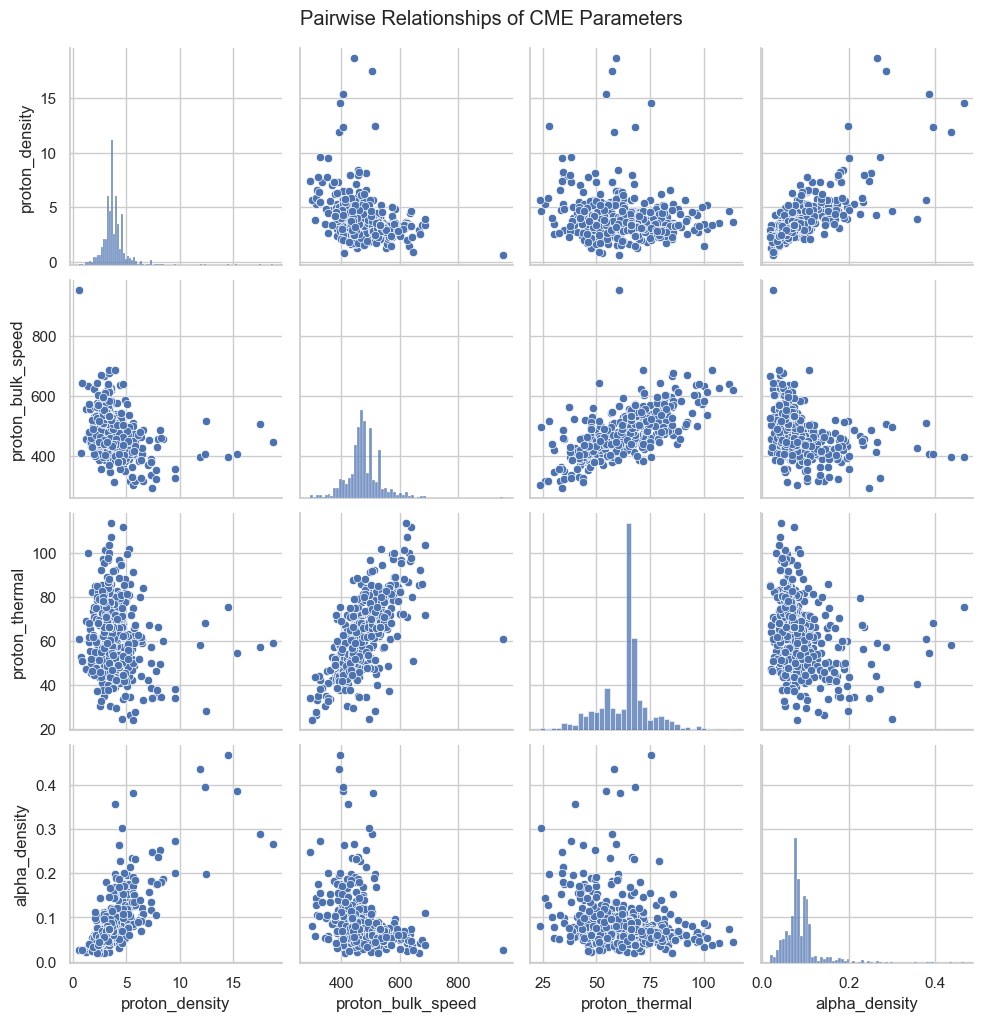

In [44]:
sns.pairplot(df[['proton_density', 'proton_bulk_speed', 'proton_thermal', 'alpha_density']].dropna())
plt.suptitle("Pairwise Relationships of CME Parameters", y=1.02)
plt.show()


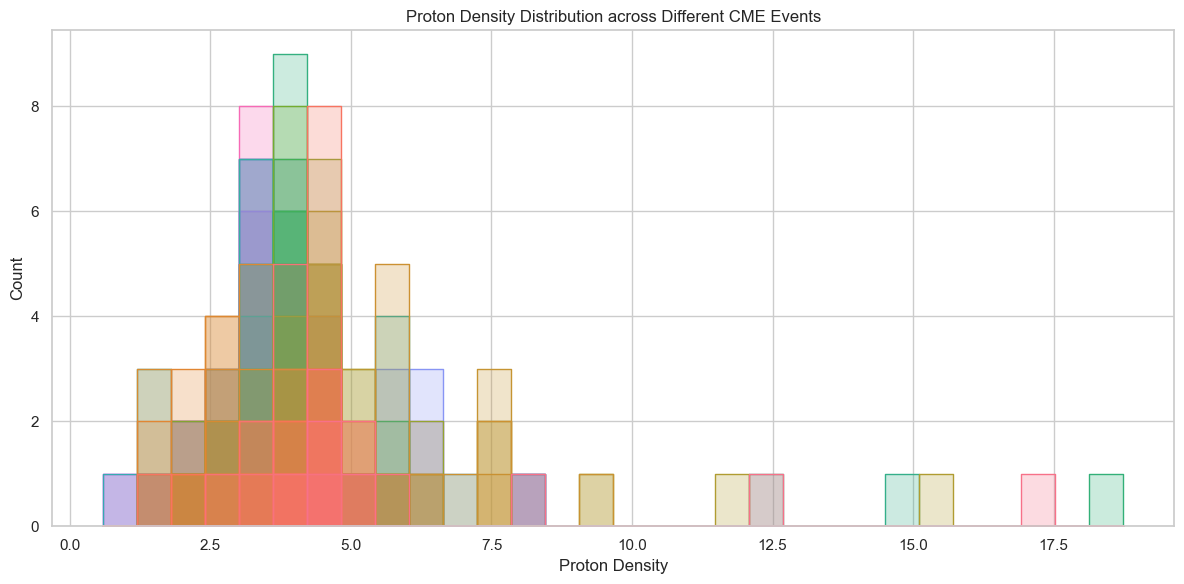

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='proton_density', hue='source_file', bins=30, element='step', legend=False)
plt.title("Proton Density Distribution across Different CME Events")
plt.xlabel("Proton Density")
plt.tight_layout()
plt.show()
